### Numerical Symmetrisation

This is a simple example of the algorithm used for symmetrising galaxy halos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

central_name='most_massive'

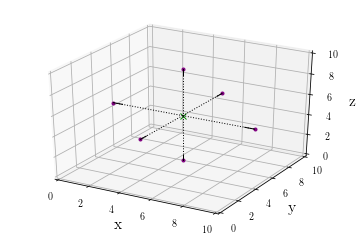

In [2]:
from mbiilib import symmetry as sym
from mbiilib import visualisation as vis

# Select a point to rotate about. This is entirely arbitrary.
x0,y0,z0=5.,5.,5.

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Starting position of the test galaxy, offset from the pivot by some distance along one axis
x1 = x0+4.5
y1 = y0
z1 = z0
pos = np.array([x1-x0,y1-y0,z1-z0])

# Let's just have it pointing radially towards the centroid.
dx = x1-x0
dy = y1-y0
dz = z1-z0
a3d = np.array([dx,dy,dz])
a3d /= np.sqrt(sum(a3d*a3d))

# Plot its position and shape prior to rotation
ax = vis.plot_gal_3d(ax, a3d, [x0,y0,z0], [x1,y1,z1])

# Rotate
R = sym.build_rotation_matrix(theta=0, phi=np.pi/2, alpha=np.pi/2)
arot = np.dot(R,a3d)
rot = np.dot(R,pos)

# Replot
ax = vis.plot_gal_3d(ax, arot, [x0,y0,z0], [rot[0]+x0, rot[1]+y0, rot[2]+z0], show_centroid=False)

# Now repeat the last two steps for a few more end configurations
R = sym.build_rotation_matrix(theta=0, phi=np.pi/2, alpha=np.pi)
arot = np.dot(R,a3d)
rot = np.dot(R,pos)
ax = vis.plot_gal_3d(ax, arot, [x0,y0,z0], [rot[0]+x0, rot[1]+y0, rot[2]+z0], show_centroid=False)

R = sym.build_rotation_matrix(theta=0, phi=np.pi/2, alpha=-np.pi/2)
arot = np.dot(R,a3d)
rot = np.dot(R,pos)
ax = vis.plot_gal_3d(ax, arot, [x0,y0,z0], [rot[0]+x0, rot[1]+y0, rot[2]+z0], show_centroid=False)

R = sym.build_rotation_matrix(theta=np.pi/2, phi=np.pi/2, alpha=-np.pi/2)
arot = np.dot(R,a3d)
rot = np.dot(R,pos)
ax = vis.plot_gal_3d(ax, arot, [x0,y0,z0], [rot[0]+x0, rot[1]+y0, rot[2]+z0], show_centroid=False)

R = sym.build_rotation_matrix(theta=np.pi/2, phi=np.pi/2, alpha=np.pi/2)
arot = np.dot(R,a3d)
rot = np.dot(R,pos)
ax = vis.plot_gal_3d(ax, arot, [x0,y0,z0], [rot[0]+x0, rot[1]+y0, rot[2]+z0], show_centroid=False)


plt.show()

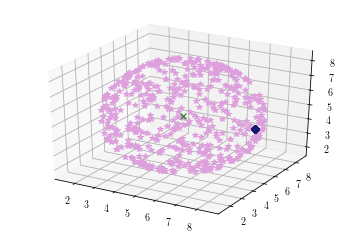

In [8]:
# So the above shows that we can successfully rotate test points
# and maintain the relative 3D orientation to the pivot
# Now let's try a slightly more complex case, where we care about
# the final distribution of points

# We have a set of taget positions (isotropically distributed on a sphere)
target = sym.sample_sphere(500, seed=9099, norm=3.5)
# And we have an anisotropic set of starting positions, which we want
# to redistribute
# (In fact these 500 points are really _very_ tightly clustered)
source = np.array([np.zeros(500)+3.5, np.zeros(500), np.zeros(500)])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
ax.plot(x0+target[0], y0+target[1], z0+target[2], '*', color='plum')
ax.plot(x0+source[0], y0+source[1], z0+source[2], 'D', color='midnightblue')
ax.plot([x0], [y0], [z0], 'x', color='g')
plt.show()



In [19]:
# To map one distribution onto the other we simply need to compute the
# rotation matrix in the same way as we did earlier
R = []

for t,s in zip(target.T,source.T):
    rotation_axis, rotation_angle = sym.infer_rotation_angle(s,t)
    Rxyz = sym.build_rotation_matrix(alpha=rotation_angle, vec=rotation_axis)
    R.append([Rxyz])
    
print(R[100][0])

[[ 0.39018363  0.86144884  0.32505788]
 [-0.86144884  0.46618986 -0.20142716]
 [-0.32505788 -0.20142716  0.92399376]]
